In [ ]:
import pickle
import gzip
import numpy as np
import scipy
import pandas as pd
import tensorflow as tf
import keras
import keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Input, LSTM, Dense, Lambda, Conv1D, Conv2D, AveragePooling2D, AveragePooling1D, Flatten, MaxPooling2D, MaxPooling1D, Dropout
from keras.models import Model
from keras.models import Sequential
from keras.utils import Sequence
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop
from keras.applications import imagenet_utils
from keras import backend as K
from time import time
from keras import losses
from sklearn.metrics import  roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score, mean_absolute_error
import glob
from PIL import Image
import h5py
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.gaussian_process as gp
import pandas as pd
import pickle
from joblib import dump, load
from sklearn.utils import shuffle
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Dec 23 00:03:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !rm -R qmc qmc1
    !git clone https://github.com/fagonzalezo/qmc.git
    !mv qmc qmc1
    !mv qmc1/qmc .
else:
    import sys
    sys.path.insert(0, "../")

rm: cannot remove 'qmc': No such file or directory
rm: cannot remove 'qmc1': No such file or directory
Cloning into 'qmc'...
remote: Enumerating objects: 215, done.
remote: Total 215 (delta 0), reused 0 (delta 0), pack-reused 215
Receiving objects: 100% (215/215), 17.06 MiB | 26.71 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [ ]:
import qmc.tf.layers as layers
import qmc.tf.models as models

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/ICML2021/diabetes/data/diabetes.data_train_5.1', header = None, sep = ' ')
X = data.to_numpy()
y = X[:,2]
X = X[:,0:2]

Los labels van de 1 a 5

In [ ]:
print(max(y))
print(min(y))

[1.]
[0.]


In [ ]:
y = (y-1)/4
y = np.float64(y)
y = y.reshape((30,1))
X = np.float64(X)

Normalizando los datos:

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
from scipy.spatial import distance

distances = distance.cdist(X, X, 'euclidean')

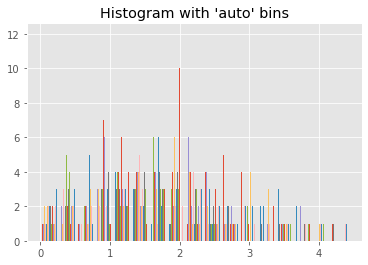

In [ ]:
import matplotlib.pyplot as plt

_ = plt.hist(distances, bins='auto')  # arguments are passed to np.histogram

plt.title("Histogram with 'auto' bins")

plt.show()

Sigma:

In [ ]:
print(np.mean(distances))
print(np.median(distances))

1.730574947599839
1.7011029955629449


Gamma:

In [ ]:
print(1/(np.mean(distances)**2))
print(1/(np.median(distances)**2))

0.33390211898025207
0.3455721868426817


In [ ]:
BIG_MAE=[]
for i in range(20):
    print('----------------------------------------',i+1)
    number = str(i+1)
    train_path = '/content/drive/My Drive/Colab_Notebooks/ICML2021/diabetes/data/diabetes.data_train_5.'
    test_path = '/content/drive/My Drive/Colab_Notebooks/ICML2021/diabetes/data/diabetes.data_test_5.'
    
    data = pd.read_csv(train_path+number, header = None, sep = ' ')
    X = data.to_numpy()
    y = X[:,2]
    X = X[:,0:2]

    y = (y-1)/4
    y = np.float64(y)
    y = y.reshape((30,1))
    X = np.float64(X)

    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)

    MAE_opt = 100
    dim_y = 5
    

    beta_opt = 4.206777753840782 
    gamma_opt = 0.5967279025627464
    learning_rate_opt = 5.3431814899877006e-06
    alpha_opt = 0.8831284074946377
    dim_x_opt = 355 
    num_eig_opt = 88 

       
    X_train = X
    y_train = y

    X_test = pd.read_csv(test_path+number, header = None, sep = ' ')
    X_test = X_test.to_numpy()
    X_test = np.float64(X_test)
    y_test = X_test[:,2]
    X_test = X_test[:,0:2]
    X_test = scaler.transform(X_test)
    y_test = (y_test-1)/4
    y_test = np.float64(y_test)
    y_test = y_test.reshape((13,1))

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta_opt)
    fm_x = layers.QFeatureMapRFF(2, dim=dim_x_opt, gamma=gamma_opt, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=2, dim_x=dim_x_opt, num_eig=num_eig_opt, dim_y=dim_y, gamma=gamma_opt, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x_opt, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_opt)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.mean_squared_error(y_true, y_pred[:,0:1]) + alpha_opt * y_pred[:, 1:2]

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=0,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])
    print('------------MAE =', mean_absolute_error(np.rint(y_test*4)+1, np.rint(y_pred*4)+1))
    BIG_MAE.append(mean_absolute_error(np.rint(y_test*4)+1, np.rint(y_pred*4)+1))

---------------------------------------- 1
8/8 [==============================] - 1s 2ms/step
------------MAE = 0.6153846153846154
---------------------------------------- 2
8/8 [==============================] - 0s 2ms/step
------------MAE = 0.6153846153846154
---------------------------------------- 3
8/8 [==============================] - 0s 2ms/step
------------MAE = 0.6153846153846154
---------------------------------------- 4
8/8 [==============================] - 0s 1ms/step
------------MAE = 0.5384615384615384
---------------------------------------- 5
8/8 [==============================] - 0s 2ms/step
------------MAE = 0.6153846153846154
---------------------------------------- 6
8/8 [==============================] - 0s 2ms/step
------------MAE = 0.6153846153846154
---------------------------------------- 7
8/8 [==============================] - 0s 2ms/step
------------MAE = 0.7692307692307693
---------------------------------------- 8
8/8 [==============================] - 0

In [ ]:
np.mean(BIG_MAE), np.std(BIG_MAE)

(0.6307692307692306, 0.0521717691009636)

In [ ]:
BIG_MAE=[]
for i in range(20):
    print('----------------------------------------',i+1)
    number = str(i+1)
    train_path = '/content/drive/My Drive/Colab_Notebooks/ICML2021/diabetes/data/diabetes.data_train_5.'
    test_path = '/content/drive/My Drive/Colab_Notebooks/ICML2021/diabetes/data/diabetes.data_test_5.'
    
    data = pd.read_csv(train_path+number, header = None, sep = ' ')
    X = data.to_numpy()
    y = X[:,2]
    X = X[:,0:2]

    y = (y-1)/4
    y = np.float64(y)
    y = y.reshape((30,1))
    X = np.float64(X)

    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)

    MAE_opt = 100
    dim_y = 5

    beta_opt = 2.808545316622041
    gamma_opt = 0.887259364767345
    learning_rate_opt = 2.1891657182422973e-06
    alpha_opt = 0.3560736435215306
    dim_x_opt = 1751
    num_eig_opt = 54
       
    X_train = X
    y_train = y

    X_test = pd.read_csv(test_path+number, header = None, sep = ' ')
    X_test = X_test.to_numpy()
    X_test = np.float64(X_test)
    y_test = X_test[:,2]
    X_test = X_test[:,0:2]
    X_test = scaler.transform(X_test)
    y_test = (y_test-1)/4
    y_test = np.float64(y_test)
    y_test = y_test.reshape((13,1))

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta_opt)
    fm_x = layers.QFeatureMapRFF(2, dim=dim_x_opt, gamma=gamma_opt, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=2, dim_x=dim_x_opt, num_eig=num_eig_opt, dim_y=dim_y, gamma=gamma_opt, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x_opt, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_opt)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.mean_squared_error(y_true, y_pred[:,0:1]) + alpha_opt * y_pred[:, 1:2]

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=0,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])
    print('------------MAE =', mean_absolute_error(np.rint(y_test*4)+1, np.rint(y_pred*4)+1))
    BIG_MAE.append(mean_absolute_error(np.rint(y_test*4)+1, np.rint(y_pred*4)+1))

np.mean(BIG_MAE), np.std(BIG_MAE)

---------------------------------------- 1
8/8 [==============================] - 0s 8ms/step
------------MAE = 0.46153846153846156
---------------------------------------- 2
8/8 [==============================] - 0s 7ms/step
------------MAE = 0.6153846153846154
---------------------------------------- 3
8/8 [==============================] - 0s 8ms/step
------------MAE = 0.5384615384615384
---------------------------------------- 4
8/8 [==============================] - 0s 8ms/step
------------MAE = 0.6923076923076923
---------------------------------------- 5
8/8 [==============================] - 0s 8ms/step
------------MAE = 0.5384615384615384
---------------------------------------- 6
8/8 [==============================] - 0s 8ms/step
------------MAE = 0.5384615384615384
---------------------------------------- 7
8/8 [==============================] - 0s 8ms/step
------------MAE = 0.6923076923076923
---------------------------------------- 8
8/8 [==============================] - 

(0.6076923076923076, 0.068370726287043)

In [ ]:
BIG_MAE=[]
for i in range(20):
    print('----------------------------------------',i+1)
    number = str(i+1)
    train_path = '/content/drive/My Drive/Colab_Notebooks/ICML2021/diabetes/data/diabetes.data_train_5.'
    test_path = '/content/drive/My Drive/Colab_Notebooks/ICML2021/diabetes/data/diabetes.data_test_5.'
    
    data = pd.read_csv(train_path+number, header = None, sep = ' ')
    X = data.to_numpy()
    y = X[:,2]
    X = X[:,0:2]

    y = (y-1)/4
    y = np.float64(y)
    y = y.reshape((30,1))
    X = np.float64(X)

    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)

    MAE_opt = 100
    dim_y = 5

    beta_opt = 15.715993729423714
    gamma_opt = 0.02926544631569372
    learning_rate_opt = 5.059549795326482e-05
    alpha_opt = 0.8155379943771295
    dim_x_opt = 1614
    num_eig_opt = 100
       
    X_train = X
    y_train = y

    X_test = pd.read_csv(test_path+number, header = None, sep = ' ')
    X_test = X_test.to_numpy()
    X_test = np.float64(X_test)
    y_test = X_test[:,2]
    X_test = X_test[:,0:2]
    X_test = scaler.transform(X_test)
    y_test = (y_test-1)/4
    y_test = np.float64(y_test)
    y_test = y_test.reshape((13,1))

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta_opt)
    fm_x = layers.QFeatureMapRFF(2, dim=dim_x_opt, gamma=gamma_opt, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=2, dim_x=dim_x_opt, num_eig=num_eig_opt, dim_y=dim_y, gamma=gamma_opt, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x_opt, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_opt)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.mean_squared_error(y_true, y_pred[:,0:1]) + alpha_opt * y_pred[:, 1:2]

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=0,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])
    print('------------MAE =', mean_absolute_error(np.rint(y_test*4)+1, np.rint(y_pred*4)+1))
    BIG_MAE.append(mean_absolute_error(np.rint(y_test*4)+1, np.rint(y_pred*4)+1))

np.mean(BIG_MAE), np.std(BIG_MAE)

---------------------------------------- 1
8/8 [==============================] - 0s 6ms/step
------------MAE = 0.46153846153846156
---------------------------------------- 2
8/8 [==============================] - 0s 7ms/step
------------MAE = 0.6153846153846154
---------------------------------------- 3
8/8 [==============================] - 0s 7ms/step
------------MAE = 0.7692307692307693
---------------------------------------- 4
8/8 [==============================] - 0s 7ms/step
------------MAE = 0.6153846153846154
---------------------------------------- 5
8/8 [==============================] - 0s 7ms/step
------------MAE = 0.5384615384615384
---------------------------------------- 6
8/8 [==============================] - 0s 7ms/step
------------MAE = 0.46153846153846156
---------------------------------------- 7
8/8 [==============================] - 0s 7ms/step
------------MAE = 0.6923076923076923
---------------------------------------- 8
8/8 [==============================] -

(0.6, 0.08634593969478326)

In [ ]:
BIG_MAE=[]
for i in range(20):
    print('----------------------------------------',i+1)
    number = str(i+1)
    train_path = '/content/drive/My Drive/Colab_Notebooks/ICML2021/diabetes/data/diabetes.data_train_5.'
    test_path = '/content/drive/My Drive/Colab_Notebooks/ICML2021/diabetes/data/diabetes.data_test_5.'
    
    data = pd.read_csv(train_path+number, header = None, sep = ' ')
    X = data.to_numpy()
    y = X[:,2]
    X = X[:,0:2]

    y = (y-1)/4
    y = np.float64(y)
    y = y.reshape((30,1))
    X = np.float64(X)

    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)

    MAE_opt = 100
    dim_y = 5

    beta_opt = 1.2731828908727927
    gamma_opt = 0.23469218495107547
    learning_rate_opt = 2.9805837449155395e-05
    alpha_opt = 0.801033620165488
    dim_x_opt = 401
    num_eig_opt = 12
       
    X_train = X
    y_train = y

    X_test = pd.read_csv(test_path+number, header = None, sep = ' ')
    X_test = X_test.to_numpy()
    X_test = np.float64(X_test)
    y_test = X_test[:,2]
    X_test = X_test[:,0:2]
    X_test = scaler.transform(X_test)
    y_test = (y_test-1)/4
    y_test = np.float64(y_test)
    y_test = y_test.reshape((13,1))

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta_opt)
    fm_x = layers.QFeatureMapRFF(2, dim=dim_x_opt, gamma=gamma_opt, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=2, dim_x=dim_x_opt, num_eig=num_eig_opt, dim_y=dim_y, gamma=gamma_opt, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x_opt, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_opt)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.mean_squared_error(y_true, y_pred[:,0:1]) + alpha_opt * y_pred[:, 1:2]

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=0,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])
    print('------------MAE =', mean_absolute_error(np.rint(y_test*4)+1, np.rint(y_pred*4)+1))
    BIG_MAE.append(mean_absolute_error(np.rint(y_test*4)+1, np.rint(y_pred*4)+1))

np.mean(BIG_MAE), np.std(BIG_MAE)

---------------------------------------- 1
8/8 [==============================] - 0s 2ms/step
------------MAE = 0.38461538461538464
---------------------------------------- 2
8/8 [==============================] - 0s 2ms/step
------------MAE = 0.6153846153846154
---------------------------------------- 3
8/8 [==============================] - 0s 2ms/step
------------MAE = 0.46153846153846156
---------------------------------------- 4
8/8 [==============================] - 0s 2ms/step
------------MAE = 0.46153846153846156
---------------------------------------- 5
8/8 [==============================] - 0s 2ms/step
------------MAE = 0.38461538461538464
---------------------------------------- 6
8/8 [==============================] - 0s 2ms/step
------------MAE = 0.46153846153846156
---------------------------------------- 7
8/8 [==============================] - 0s 2ms/step
------------MAE = 0.6153846153846154
---------------------------------------- 8
8/8 [==============================

(0.5153846153846153, 0.06923076923076922)